In [1]:
!pip install tensorflow==1.14.0
import os, time, itertools, imageio, pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\ProgramData\Anaconda3\envs\tf114\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\tf114\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\tf114\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\tf114\lib\site-packages\tensorflow\python\f

In [2]:
# G(z)
def generator(x):
    
    # initializers
    
    w_init = tf.truncated_normal_initializer(mean=0, stddev=0.02)
    b_init = tf.constant_initializer(0.)

    # 1st hidden layer
   
    w0 = tf.get_variable('G_w0', [x.get_shape()[1], 256], initializer=w_init)
    b0 = tf.get_variable('G_b0', [256], initializer=b_init)
    h0 = tf.nn.leaky_relu(tf.matmul(x, w0) + b0)

    # 2d hidden layer
    # h0.get_shape()[1] = 256 - output of the 1st layer
    w1 = tf.get_variable('G_w1', [h0.get_shape()[1], 512], initializer=w_init)
    b1 = tf.get_variable('G_b1', [512], initializer=b_init)
    h1 = tf.nn.leaky_relu(tf.matmul(h0, w1) + b1)

    # 3d hidden layer
    w2 = tf.get_variable('G_w2', [h1.get_shape()[1], 1024], initializer=w_init)
    b2 = tf.get_variable('G_b2', [1024], initializer=b_init)
    h2 = tf.nn.leaky_relu(tf.matmul(h1, w2) + b2)

    # output layer
    w3 = tf.get_variable('G_w3', [h2.get_shape()[1], 784], initializer=w_init)
    b3 = tf.get_variable('G_b3', [784], initializer=b_init)
    o = tf.nn.tanh(tf.matmul(h2, w3) + b3)
    
    return o

    ### Code:ToDO( Change the architecture as CW2 Guidance required) ---> Implemented

In [3]:
# D(x)
def discriminator(x, drop_out):
    # initializers
    w_init = tf.truncated_normal_initializer(mean=0, stddev=0.02)
    b_init = tf.constant_initializer(0.)
    
    # 1st hidden layer
    w0 = tf.get_variable('D_w0', [x.get_shape()[1], 1024], initializer=w_init)
    b0 = tf.get_variable('D_b0', [1024], initializer=b_init)
    h0 = tf.nn.dropout(tf.nn.leaky_relu(tf.matmul(x, w0) + b0), drop_out)

    # 2d hidden layer
    w1 = tf.get_variable('D_w1', [h0.get_shape()[1], 512], initializer=w_init)
    b1 = tf.get_variable('D_b1', [512], initializer=b_init)
    h1 = tf.nn.dropout(tf.nn.leaky_relu(tf.matmul(h0, w1) + b1), drop_out)

    # 3d hidden layer
    w2 = tf.get_variable('D_w2', [h1.get_shape()[1], 256], initializer=w_init)
    b2 = tf.get_variable('D_b2', [256], initializer=b_init)
    h2 = tf.nn.dropout(tf.nn.leaky_relu(tf.matmul(h1, w2) + b2), drop_out)
    
    # output layer
    w3 = tf.get_variable('D_w3', [h2.get_shape()[1], 1], initializer=w_init)
    b3 = tf.get_variable('D_b3', [1], initializer=b_init)
    o = tf.sigmoid(tf.matmul(h2, w3) + b3)
    
    return o
    ###  Code: ToDO( Change the architecture as CW2 Guidance required) ---> Implemented

In [4]:
#def show_result(num_epoch, show = True, save = True, path = 'result.png'):
    #z_ = np.random.normal(0, 1, (25, 100))    # z_ is the input of generator, every epochs will random produce input
    
    ##Code:ToDo complete the rest of part  ---> Implemented

def show_result(num_epoch, folder_name, name = 'result.png', isFix=False):
    z_ = np.random.normal(0, 1, (25, 100))

    if isFix:
        test_images = sess.run(G_z, {z: fixed_z_, drop_out: 0.0})
    else:
        test_images = sess.run(G_z, {z: z_, drop_out: 0.0})

    size_figure_grid = 5
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(5*5):
        i = k // 5
        j = k % 5
        ax[i, j].cla()
        ax[i, j].imshow(np.reshape(test_images[k], (28, 28)), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')
    
    plt.savefig(name)
    
    
    if num_epoch == 10 or num_epoch == 20 or num_epoch == 50 or num_epoch == 100:
        plt.show()
        
    plt.close()

In [5]:
def show_train_hist(hist, show = False, save = False, path = 'Train_hist.png'):
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

In [6]:
# training parameters

batch_size = 100
lr = 0.0002
train_epoch = 100

In [7]:
# load MNIST
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_set = (mnist.train.images - 0.5) / 0.5  # normalization; range: -1 ~ 1

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
# networks : generator

with tf.variable_scope('G'):
    z = tf.placeholder(tf.float32, shape=(None, 100))
    G_z = generator(z)

In [9]:
# networks : discriminator

with tf.variable_scope('D') as scope:
    drop_out = tf.placeholder(dtype=tf.float32, name='drop_out')
    x = tf.placeholder(tf.float32, shape=(None, 784))
    D_real = discriminator(x, drop_out)
    scope.reuse_variables()
    D_fake = discriminator(G_z, drop_out)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# loss for each network

eps = 1e-2
D_loss = tf.reduce_mean(-tf.log(D_real + eps) - tf.log(1 - D_fake + eps))
G_loss = tf.reduce_mean(-tf.log(D_fake + eps))

In [11]:
# trainable variables for each network

t_vars = tf.trainable_variables()
D_vars = [var for var in t_vars if 'D_' in var.name]
G_vars = [var for var in t_vars if 'G_' in var.name]

In [12]:
# optimizer for each network

D_optim = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list=D_vars)
G_optim = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list=G_vars)

In [13]:
# open session and initialize all variables

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [14]:
# tf.summary.FileWriter('board_beginner',sess.graph)   # magic board 

writer = tf.summary.FileWriter('board_beginner')  # create writer
writer.add_graph(sess.graph)

In [15]:
# results save folder

if not os.path.isdir('MNIST_GAN_results'):
    os.mkdir('MNIST_GAN_results')
if not os.path.isdir('MNIST_GAN_results/results'):
    os.mkdir('MNIST_GAN_results/results')
train_hist = {}
train_hist['D_losses'] = []
train_hist['G_losses'] = []
train_hist['per_epoch_ptimes'] = []
train_hist['total_ptime'] = []

[1/100] - ptime: 32.73 loss_d: 1.149, loss_g: 0.924
[2/100] - ptime: 35.21 loss_d: 1.093, loss_g: 1.214
[3/100] - ptime: 33.03 loss_d: 0.951, loss_g: 1.738
[4/100] - ptime: 32.73 loss_d: 0.852, loss_g: 1.735
[5/100] - ptime: 32.34 loss_d: 0.789, loss_g: 1.691
[6/100] - ptime: 32.38 loss_d: 0.777, loss_g: 1.704
[7/100] - ptime: 31.36 loss_d: 0.952, loss_g: 1.427
[8/100] - ptime: 31.69 loss_d: 0.868, loss_g: 1.550
[9/100] - ptime: 30.98 loss_d: 0.870, loss_g: 1.523
[10/100] - ptime: 29.79 loss_d: 0.873, loss_g: 1.534


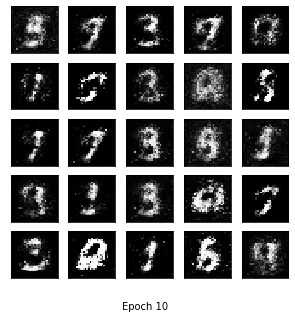

[11/100] - ptime: 28.65 loss_d: 0.985, loss_g: 1.334
[12/100] - ptime: 29.10 loss_d: 0.961, loss_g: 1.323
[13/100] - ptime: 30.08 loss_d: 0.965, loss_g: 1.346
[14/100] - ptime: 30.84 loss_d: 1.015, loss_g: 1.226
[15/100] - ptime: 29.89 loss_d: 0.959, loss_g: 1.376
[16/100] - ptime: 31.07 loss_d: 1.027, loss_g: 1.224
[17/100] - ptime: 31.28 loss_d: 1.040, loss_g: 1.194
[18/100] - ptime: 31.53 loss_d: 1.069, loss_g: 1.141
[19/100] - ptime: 28.69 loss_d: 1.047, loss_g: 1.185
[20/100] - ptime: 31.90 loss_d: 1.058, loss_g: 1.169


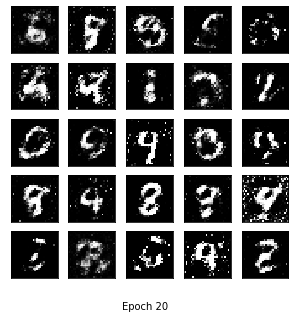

[21/100] - ptime: 28.91 loss_d: 1.076, loss_g: 1.126
[22/100] - ptime: 28.71 loss_d: 1.106, loss_g: 1.084
[23/100] - ptime: 31.32 loss_d: 1.108, loss_g: 1.049
[24/100] - ptime: 30.34 loss_d: 1.098, loss_g: 1.090
[25/100] - ptime: 28.64 loss_d: 1.105, loss_g: 1.087
[26/100] - ptime: 28.69 loss_d: 1.107, loss_g: 1.084
[27/100] - ptime: 29.04 loss_d: 1.127, loss_g: 1.047
[28/100] - ptime: 30.55 loss_d: 1.154, loss_g: 0.996
[29/100] - ptime: 29.23 loss_d: 1.168, loss_g: 0.983
[30/100] - ptime: 28.21 loss_d: 1.172, loss_g: 0.968
[31/100] - ptime: 28.70 loss_d: 1.186, loss_g: 0.940
[32/100] - ptime: 28.30 loss_d: 1.192, loss_g: 0.927
[33/100] - ptime: 29.43 loss_d: 1.197, loss_g: 0.935
[34/100] - ptime: 29.78 loss_d: 1.204, loss_g: 0.924
[35/100] - ptime: 29.21 loss_d: 1.182, loss_g: 0.949
[36/100] - ptime: 28.56 loss_d: 1.192, loss_g: 0.942
[37/100] - ptime: 28.15 loss_d: 1.201, loss_g: 0.920
[38/100] - ptime: 28.47 loss_d: 1.200, loss_g: 0.925
[39/100] - ptime: 30.23 loss_d: 1.201, loss_g:

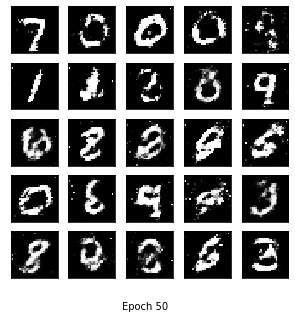

[51/100] - ptime: 28.88 loss_d: 1.242, loss_g: 0.854
[52/100] - ptime: 27.73 loss_d: 1.228, loss_g: 0.878
[53/100] - ptime: 33.27 loss_d: 1.230, loss_g: 0.874
[54/100] - ptime: 29.66 loss_d: 1.238, loss_g: 0.864
[55/100] - ptime: 30.35 loss_d: 1.234, loss_g: 0.877
[56/100] - ptime: 29.82 loss_d: 1.241, loss_g: 0.856
[57/100] - ptime: 30.15 loss_d: 1.256, loss_g: 0.829
[58/100] - ptime: 30.82 loss_d: 1.260, loss_g: 0.835
[59/100] - ptime: 29.79 loss_d: 1.267, loss_g: 0.822
[60/100] - ptime: 30.64 loss_d: 1.262, loss_g: 0.831
[61/100] - ptime: 34.09 loss_d: 1.254, loss_g: 0.823
[62/100] - ptime: 34.52 loss_d: 1.259, loss_g: 0.830
[63/100] - ptime: 34.13 loss_d: 1.262, loss_g: 0.821
[64/100] - ptime: 30.21 loss_d: 1.271, loss_g: 0.814
[65/100] - ptime: 30.48 loss_d: 1.267, loss_g: 0.827
[66/100] - ptime: 30.36 loss_d: 1.261, loss_g: 0.829
[67/100] - ptime: 30.71 loss_d: 1.268, loss_g: 0.818
[68/100] - ptime: 30.81 loss_d: 1.269, loss_g: 0.815
[69/100] - ptime: 29.55 loss_d: 1.269, loss_g:

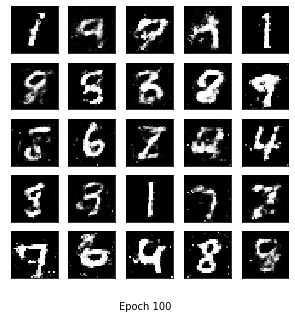

Avg per epoch ptime: 29.76, total 100 epochs ptime: 3063.66
Training finish!... save training results


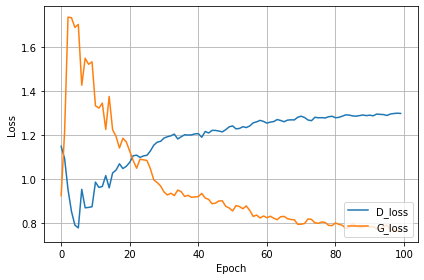

In [16]:
# training-loop

np.random.seed(int(time.time()))
start_time = time.time()
for epoch in range(train_epoch):
    G_losses = []
    D_losses = []
    epoch_start_time = time.time()
    for iter in range(train_set.shape[0] // batch_size):
        
        # update discriminator
        x_ = train_set[iter*batch_size:(iter+1)*batch_size]
        z_ = np.random.normal(0, 1, (batch_size, 100))

        loss_d_, _ = sess.run([D_loss, D_optim], {x: x_, z: z_, drop_out: 0.3})
        D_losses.append(loss_d_)

        # update generator
        z_ = np.random.normal(0, 1, (batch_size, 100))
        loss_g_, _ = sess.run([G_loss, G_optim], {z: z_, drop_out: 0.3})
        G_losses.append(loss_g_)

    epoch_end_time = time.time()
    per_epoch_ptime = epoch_end_time - epoch_start_time
    print('[%d/%d] - ptime: %.2f loss_d: %.3f, loss_g: %.3f' % ((epoch + 1), train_epoch, per_epoch_ptime, np.mean(D_losses), np.mean(G_losses)))
    
    ### Code: TODO Code complet show_result function)
    ###p = 'MNIST_GAN_results/results/MNIST_GAN_' + str(epoch + 1) + '.png'
    ###show_result((epoch + 1), save=True, path=p)
    #p = 'MNIST_GAN_results/results' + str(epoch + 1) + '.png'
    #show_result((epoch + 1), save=True, show = True, path = p)

    p = 'MNIST_GAN_results/MNIST_GAN_' + str(epoch + 1) + '.png'
    show_result((epoch + 1), folder_name = 'results_10', name=p, isFix=False)
        
    train_hist['D_losses'].append(np.mean(D_losses))
    train_hist['G_losses'].append(np.mean(G_losses))
    train_hist['per_epoch_ptimes'].append(per_epoch_ptime)
    end_time = time.time()
    total_ptime = end_time - start_time
    train_hist['total_ptime'].append(total_ptime)
print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (np.mean(train_hist['per_epoch_ptimes']), train_epoch, total_ptime))
print("Training finish!... save training results")

with open('C://Users/44740/Machine learning/CW2/MNIST_GAN_results/train_hist.pkl', 'wb') as f:
    pickle.dump(train_hist, f)
show_train_hist(train_hist, show=True)
images = []

sess.close()